In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

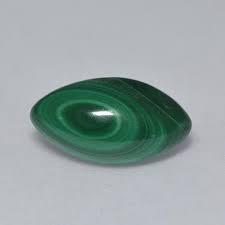

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Create train and test dir paths
train_data_dir = "../raw_data/train/"
test_data_dir = "../raw_data/test/"

img = load_img(f"{train_data_dir}Malachite/malachite_15.jpg")
X = img_to_array(img)

img

In [33]:
X.shape

(225, 225, 3)

In [34]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

# Creating a base model

In [35]:
base_model = Sequential()

base_model.add(layers.Input((225, 225, 3)))

base_model.add(layers.Flatten())

base_model.add(layers.Dense(87, activation="softmax"))

base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 151875)            0         
                                                                 
 dense_1 (Dense)             (None, 87)                13213212  
                                                                 
Total params: 13,213,212
Trainable params: 13,213,212
Non-trainable params: 0
_________________________________________________________________


In [36]:
adam = optimizers.Adam(learning_rate = 0.001)
base_model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

batch_size = 64

# Create a training dataset
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(225, 225),
    batch_size=batch_size
)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(225, 225),
    batch_size=batch_size
)

Found 2856 files belonging to 87 classes.
Found 363 files belonging to 87 classes.


In [37]:
# Fitting the base model

base_history = base_model.fit(
        train_ds,
        epochs=5,
        validation_data=val_ds,
        )

Epoch 1/5
45/45 [==============================] - 13s 185ms/step - loss: 1114.6505 - accuracy: 0.0151 - val_loss: 869.2765 - val_accuracy: 0.0331
Epoch 2/5
45/45 [==============================] - 7s 154ms/step - loss: 480.9623 - accuracy: 0.0581 - val_loss: 232.4444 - val_accuracy: 0.0799
Epoch 3/5
45/45 [==============================] - 7s 144ms/step - loss: 177.9167 - accuracy: 0.1141 - val_loss: 150.8701 - val_accuracy: 0.1102
Epoch 4/5
45/45 [==============================] - 7s 150ms/step - loss: 197.9126 - accuracy: 0.1548 - val_loss: 247.0040 - val_accuracy: 0.1267
Epoch 5/5
45/45 [==============================] - 7s 140ms/step - loss: 229.4065 - accuracy: 0.1537 - val_loss: 228.2390 - val_accuracy: 0.0744


# Creating a better model

In [ ]:
model = Sequential()

model.add(layers.Input((225, 225, 3)))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))

model.add(layers.Flatten())

'''model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))'''

model.add(layers.Dense(87, activation="softmax"))

model.summary()

2025-03-17 16:54:21.953439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-03-17 16:54:21.961916: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-03-17 16:54:21.966393: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Caerbannong): /proc/driver/nvidia/version does not exist
2025-03-17 16:54:22.011473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 480000)            0         
                                                                 
 dense (Dense)               (None, 87)                41760087  
                                                                 
Total params: 41,760,087
Trainable params: 41,760,087
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

batch_size = 64

# Create a training dataset
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(225, 225),
    batch_size=batch_size
)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(225, 225),
    batch_size=batch_size
)

Found 2856 files belonging to 87 classes.
Found 363 files belonging to 87 classes.


In [30]:
class_names = train_ds.class_names
print(class_names)

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'Spessartite

In [44]:
history = model.fit(
        train_ds,
        epochs=5,
        validation_data=val_ds,
        )

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 814ms/step - accuracy: 0.0174 - loss: 3223.3542 - val_accuracy: 0.0275 - val_loss: 2648.8015
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 862ms/step - accuracy: 0.0422 - loss: 2038.3262 - val_accuracy: 0.0744 - val_loss: 830.9117
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 802ms/step - accuracy: 0.0998 - loss: 663.5317 - val_accuracy: 0.1047 - val_loss: 535.7484
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 799ms/step - accuracy: 0.1375 - loss: 661.1664 - val_accuracy: 0.1157 - val_loss: 698.5472
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 796ms/step - accuracy: 0.1605 - loss: 618.2657 - val_accuracy: 0.1267 - val_loss: 805.7447


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/gemstones-images/test/Coral/coral_18.jpg'
img = image.load_img(img_path, target_size=(225, 225))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra batch dimension since the model expects batches of input
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

class_names = train_ds.class_names
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Kunzite


# Exporting the baseline model

In [39]:
base_model.save('baseline_model.keras')

# Current best model

In [ ]:
def initialize_model():

    model = Sequential()

    model.add(layers.Input((225, 225, 3)))
    model.add(layers.Rescaling(1./255))

    #model.add(layers.Conv2D(filters = 32, kernel_size = (4,4), activation="relu", padding="same"))
    #model.add(layers.MaxPooling2D(pool_size=(3, 3)), padding="same" )

    #model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
    #model.add(layers.MaxPooling2D(pool_size=(2, 2)), padding="same" )

    #model.add(layers.Dropout(0.5))

    #model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu"))
    #model.add(layers.MaxPooling2D(pool_size=(2, 2)) )

    #model.add(layers.Conv2D(filters = 128, kernel_size = (2,2), activation="relu"))
    #model.add(layers.MaxPooling2D(pool_size=(2, 2)) )

    model.add(layers.Flatten())

    # Here we flatten our data to end up with just one dimension

    #model.add(layers.Dense(64, activation="relu"))

    #model.add(layers.Dropout(0.7))

    model.add(layers.Dense(87, activation="softmax"))

    adam = optimizers.Adam(learning_rate = 0.1)
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam, # Play with me
                  metrics=['accuracy'])

    return model

In [43]:
model = initialize_model()

es = EarlyStopping(patience = 25, restore_best_weights = True)

history = model.fit(
        train_ds,
        epochs=300,
        callbacks = [es],
        batch_size=batch_size,
        validation_data=val_ds
        )

Epoch 1/300
45/45 [==============================] - 16s 268ms/step - loss: 46909.9805 - accuracy: 0.0210 - val_loss: 68381.5781 - val_accuracy: 0.0441
Epoch 2/300
45/45 [==============================] - 8s 168ms/step - loss: 39381.2617 - accuracy: 0.0767 - val_loss: 16187.2139 - val_accuracy: 0.0771
Epoch 3/300
45/45 [==============================] - 11s 237ms/step - loss: 8452.6094 - accuracy: 0.1569 - val_loss: 4325.0811 - val_accuracy: 0.1625
Epoch 4/300
45/45 [==============================] - 13s 268ms/step - loss: 4041.8115 - accuracy: 0.2045 - val_loss: 4413.8550 - val_accuracy: 0.1956
Epoch 5/300
45/45 [==============================] - 11s 239ms/step - loss: 3553.6196 - accuracy: 0.2525 - val_loss: 4161.9067 - val_accuracy: 0.1708
Epoch 6/300
45/45 [==============================] - 10s 203ms/step - loss: 3940.5701 - accuracy: 0.2416 - val_loss: 4491.9268 - val_accuracy: 0.1680
Epoch 7/300
45/45 [==============================] - 9s 179ms/step - loss: 3836.6953 - accuracy: 

# Plotting learning plots

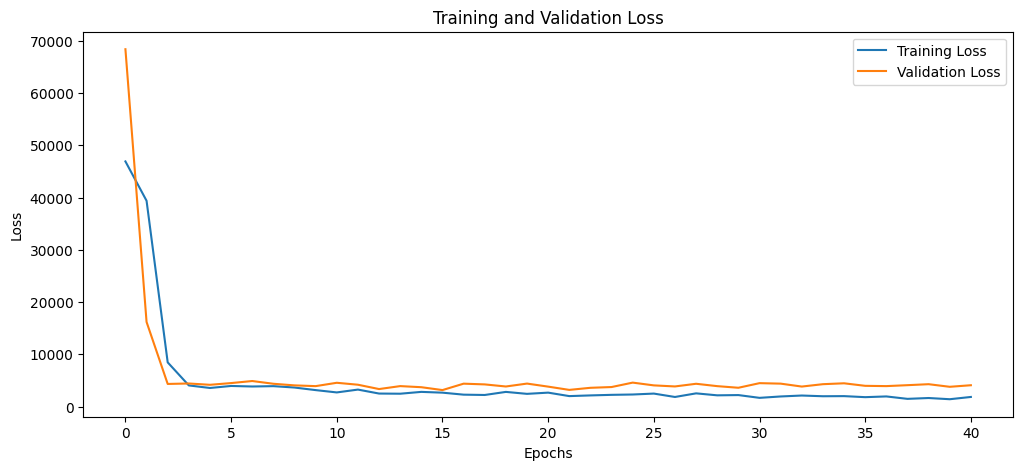

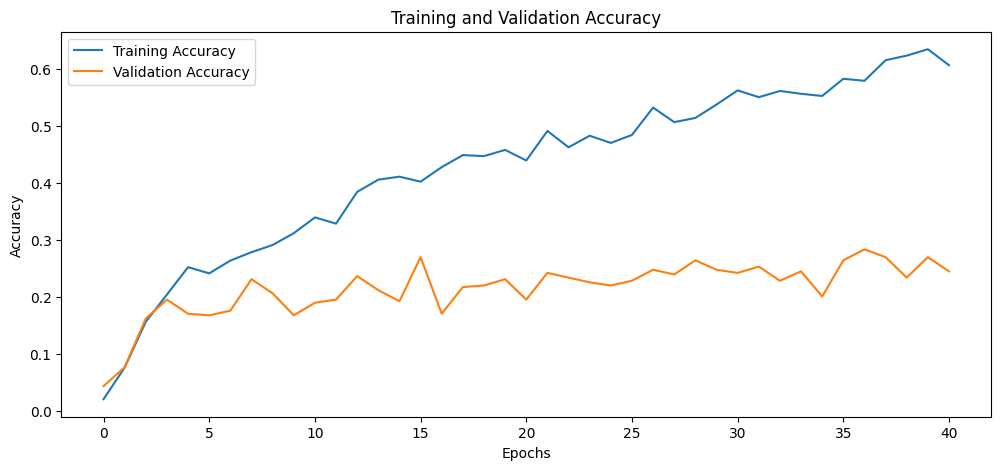

In [44]:
# Plot loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
best_val_acc = max(history.history['val_accuracy'])

In [47]:
curr_val_acc = max(history.history['val_accuracy'])

if curr_val_acc > best_val_acc:
    best_val_acc = curr_val_acc
print (f"Current val_acc: {curr_val_acc}")
print (f"Best val_acc: {best_val_acc}")

Current val_acc: 0.2837465703487396
Best val_acc: 0.2837465703487396


# Exporting current best model

In [ ]:
base_model.save('current_model.keras')